In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from matplotlib import colorbar, colors

In [27]:
t_data = xr.open_dataset('./dados/ljunho2022.nc', engine="netcdf4")

In [28]:
t_data.time[67]

<xarray.DataArray 'time' ()>
array('2022-06-23T19:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-06-23T19:00:00
Attributes:
    long_name:  time

In [31]:
n= 21
local = "Timbó"

ventinhov =  t_data.v[n,32,:]
ventinhou =  t_data.u[n,32,:]
ventov =  t_data.v[n,24,:]
ventou =  t_data.u[n,24,:]

vento1000 = np.sqrt(ventinhov**2+ventinhou**2)
vento500 = np.sqrt(ventou**2+ventov**2)

lat = t_data.latitude
lon = t_data.longitude

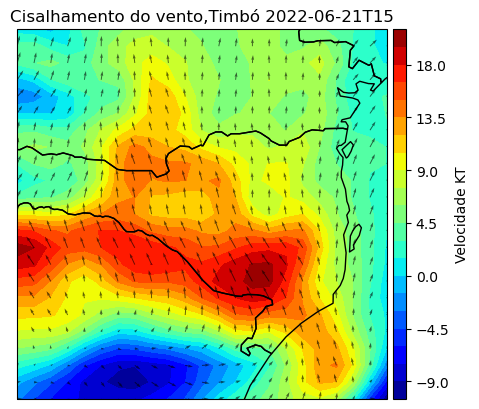

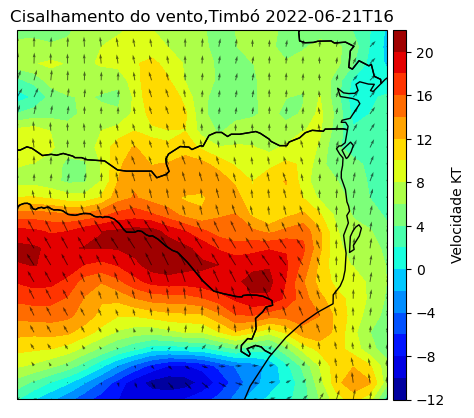

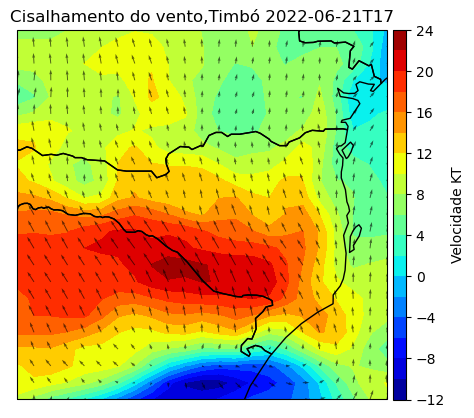

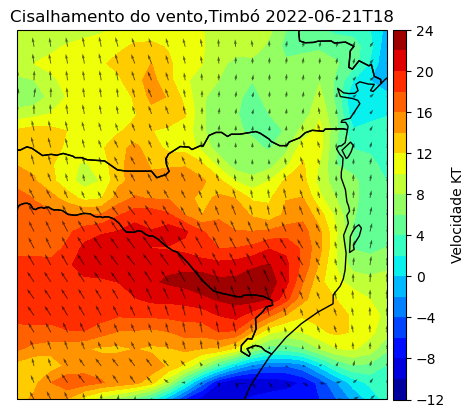

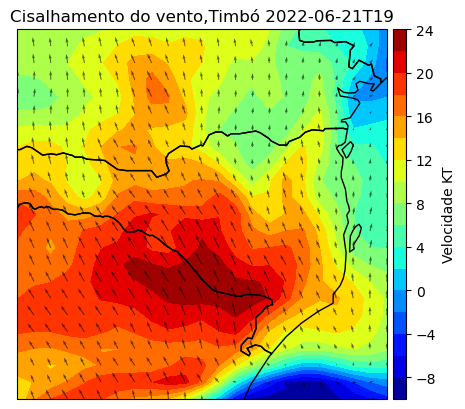

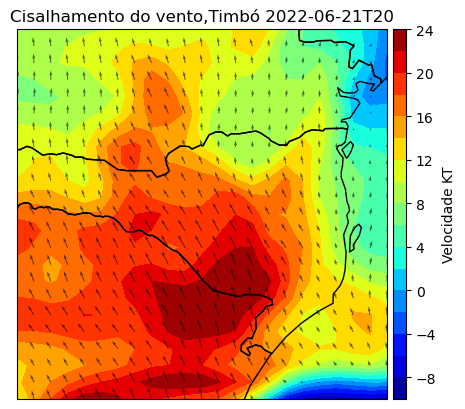

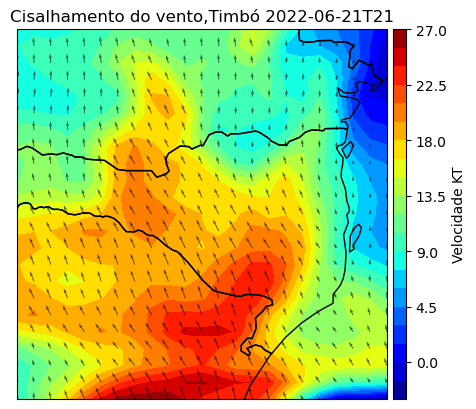

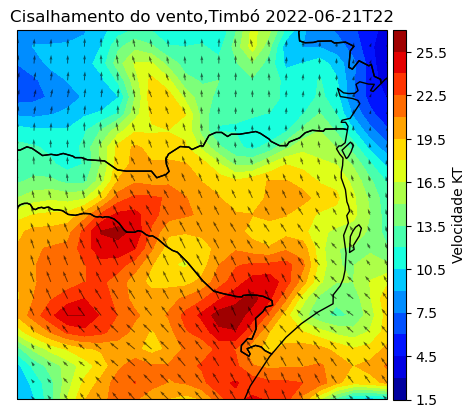

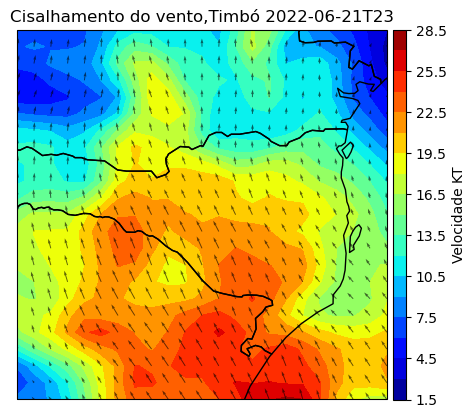

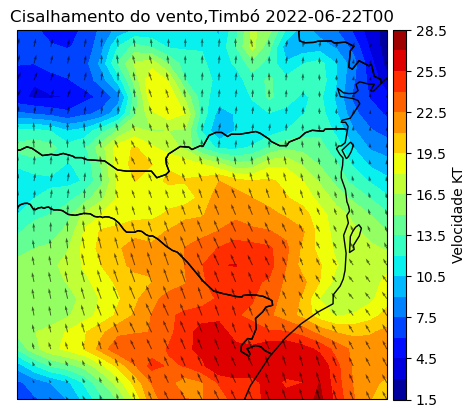

In [32]:
d = n-6
while d < n+4:
    ventinhov =  lt_data.v[d,32,:]
    ventinhou =  lt_data.u[d,32,:]
    ventov =  lt_data.v[d,24,:]
    ventou =  lt_data.u[d,24,:]
    
    hora = lt_data.time[d].values
    hora = str(hora)
    hora = hora[0:13]

    vento1000 = np.sqrt(ventinhov**2+ventinhou**2)
    vento500 = np.sqrt(ventou**2+ventov**2)
    
    fig = plt.figure()
    ax = plt.subplot(projection=ccrs.PlateCarree())
    plt.title(f"Cisalhamento do vento,{local} {hora}")

    tplot = plt.contourf(lon,lat,vento500-vento1000,cmap=plt.cm.jet, levels=20)
    plt.quiver(lon,lat,ventov-ventinhov,ventou-ventinhou,alpha=0.6);

    posn = ax.get_position()
    cbar_ax = fig.add_axes([posn.x0 + posn.width + 0.01, posn.y0, 0.02, posn.height])

    plt.colorbar(tplot, cax=cbar_ax, label='Velocidade KT')

    ax.add_feature(cfeature.STATES.with_scale('50m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\cisalhamento{d}.png', bbox_inches='tight')
    d+=1 